In [384]:
#New DataFrame
import pickle
from pathlib import Path
data_folder = Path('Z:\\Maxime Chevee')
file_to_open = data_folder / "master_log_4-5-6-18.pkl"
with open(file_to_open, 'rb') as f:
   master_log = pickle.load(f, encoding='latin1')

In [1]:
#Old DataFrame
import pickle
from pathlib import Path
data_folder = Path('Z:\\Maxime Chevee\Maxime 3\Analysis\Analysis OptoTagged 20180411')
file_to_open = data_folder / "master_log_lite.pkl"
with open(file_to_open, 'rb') as f:
   master_log = pickle.load(f, encoding='latin1')

In [2]:
#New Column: NR_licks_aligned_spikes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Create new column: spike-times are aligned to non-rewarded licks
new = []
for num in range(0, len(master_log.non_rewarded_licks)):
    new_col = []
    for ind in range(0, len(master_log.non_rewarded_licks[num])):
        new_col.append(np.array([np.squeeze(master_log['spike_times'][num])-master_log['non_rewarded_licks'][num][ind]]))
    new.append(new_col)
master_log['NR_licks_aligned_spikes'] = new

C:\Users\Brown Lab\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


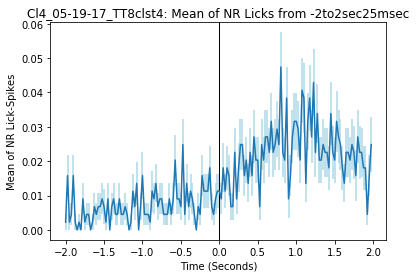

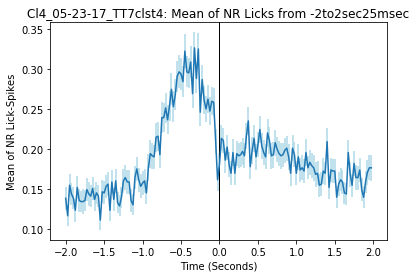

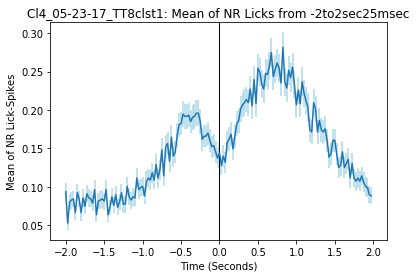

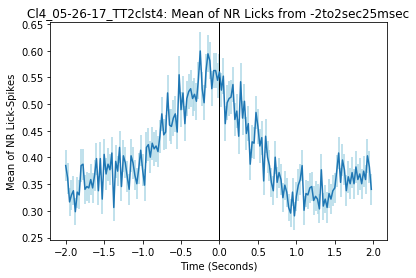

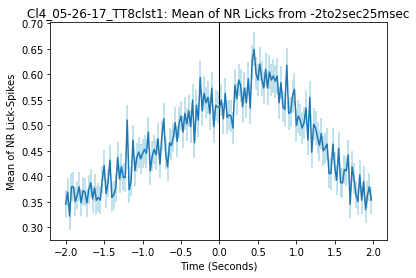

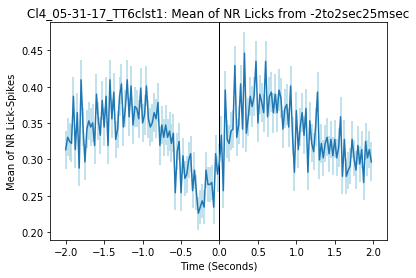

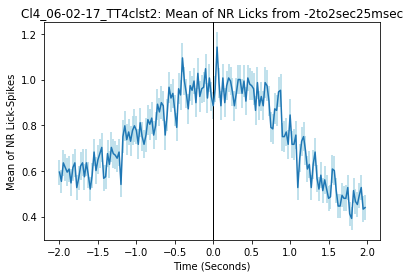

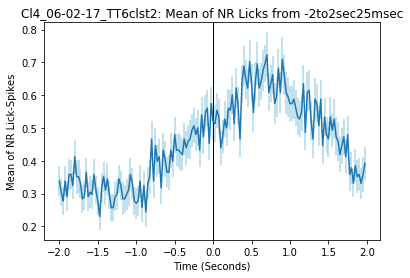

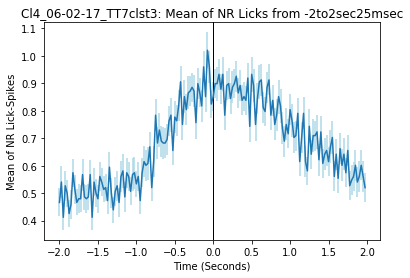

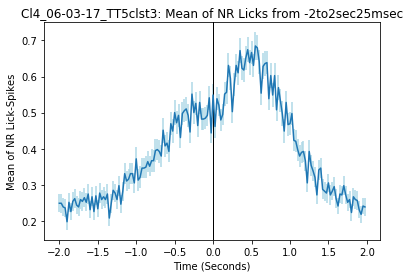

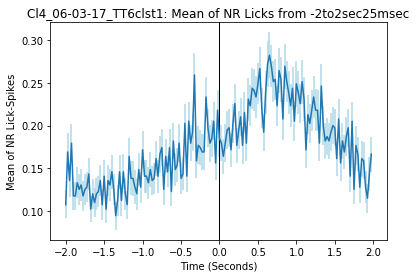

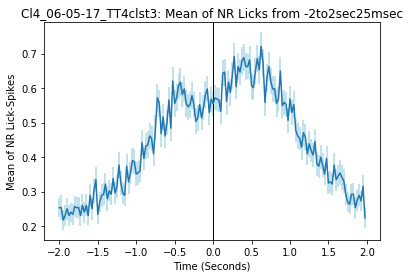

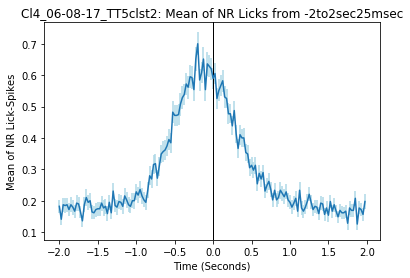

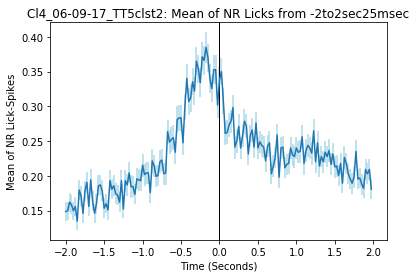

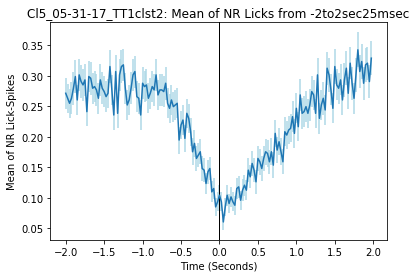

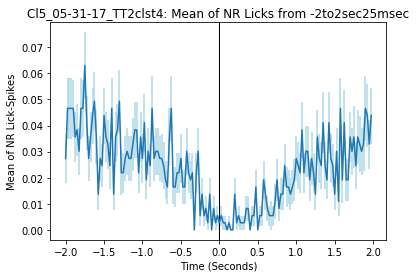

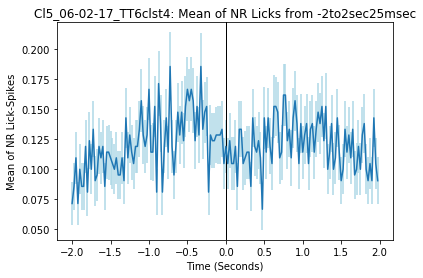

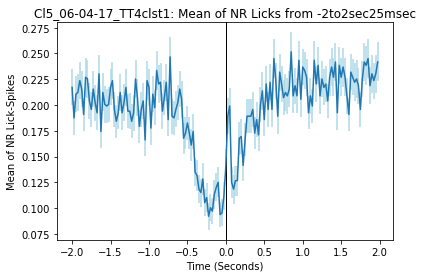

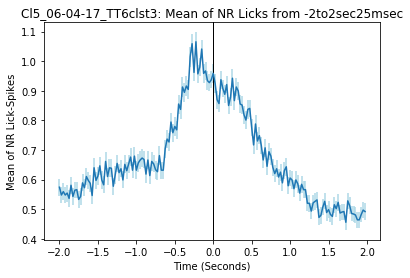

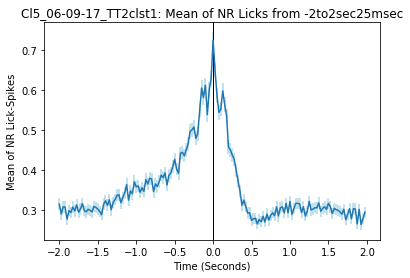

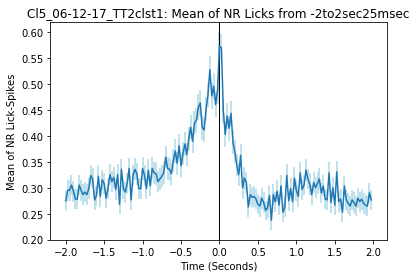

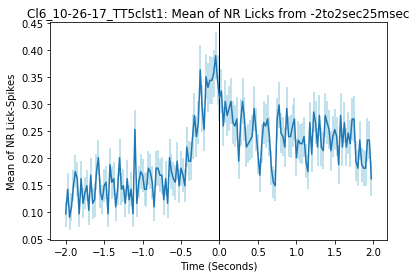

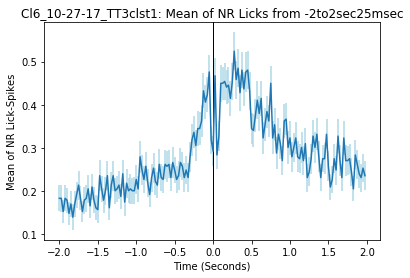

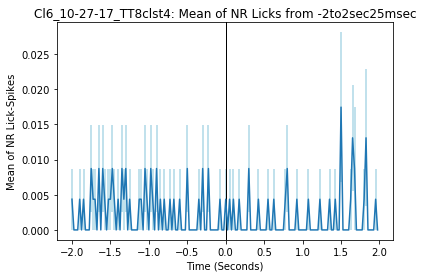

In [389]:
#Final line-graph
#Select specific neuron for histogram
#Line graph for specific neuron
#Needed checking
#Add Category filter
from scipy import stats
import matplotlib.pyplot as plt

OptoTag_neuron = list(np.unique(master_log[master_log.Category == 'OptoTag'].unit_name))
for i in range(0, len(OptoTag_neuron)):
    Neuron_NR_licks_spikes = []
    for num in range(0, len(master_log.NR_licks_aligned_spikes)):
        if ((master_log.non_rewarded_licks[num]).size != 0) & (master_log.unit_name[num] == OptoTag_neuron[i]):
            for ind in range(0, len(master_log.NR_licks_aligned_spikes[num])):
                spike_times = master_log.loc[num, 'NR_licks_aligned_spikes'][ind]
                hist = np.histogram(spike_times, bins=int((2-(-2))/0.025), range=(-2,2))[0]
                Neuron_NR_licks_spikes.append(hist)
    
    bins_mean = list(np.mean(Neuron_NR_licks_spikes, axis=0))
    bins_time = list(np.arange(-2,2,0.025))
    bins_error = list(stats.sem(Neuron_NR_licks_spikes, axis=0))
    
    fig = plt.figure(figsize=(200,4))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    ax = fig.add_subplot(1, len(OptoTag_neuron), i+1)
    ax.errorbar(bins_time, bins_mean, yerr=bins_error, ecolor = 'lightblue')
    ax.set_xlabel('Time (Seconds)')
    ax.set_ylabel('Mean of NR Lick-Spikes')
    ax.set_title(str(OptoTag_neuron[i]+': Mean of NR Licks from -2to2sec25msec'))
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    fig.savefig(str(OptoTag_neuron[i])+': Mean of NR Licks from -2to2sec25msec.pdf')

In [142]:
#Final left & right separation
#Create a fewer-bracket version of rewarded_licks
reward = []
for i in range(0, len(master_log.rewarded_licks)):
        temp = []
        for j in range(0, len(master_log.rewarded_licks[i])):
            temp.append(master_log.rewarded_licks[i][j][0])
        reward.append(temp)
#Create a fewer-bracket version of left_licks
left_total = []
for i in range(0, len(master_log.licks_left)):
    temp = []
    for j in range(0, len(master_log.licks_left[i][0][0])):
        temp.append(master_log.licks_left[i][0][0][j][0])
    left_total.append(temp)
#Create a fewer-bracket version of right_licks
right_total = []
for i in range(0, len(master_log.licks_right)):
    temp = []
    for j in range(0, len(master_log.licks_right[i][0][0])):
        temp.append(master_log.licks_right[i][0][0][j][0])
    right_total.append(temp)
#Compare left_total with reward
ind_left = []
for i in range(0, len(left_total)):
    if np.all(reward[i] == left_total[i]):
        ind_left.append(i)
for i in ind_left:
    left_total[i] = []
master_log['Left_nonrewarded'] = left_total
#Compare right_total with reward
ind_right = []
for i in range(0, len(right_total)):
    if np.all(reward[i] == right_total[i]):
        ind_right.append(i)
for i in ind_right:
    right_total[i] = []
master_log['Right_nonrewarded'] = right_total

C:\Users\Brown Lab\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


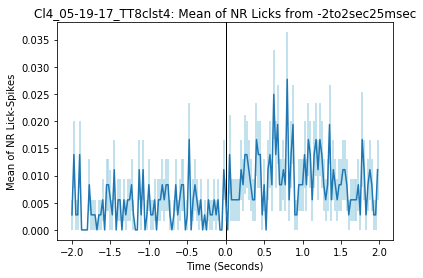

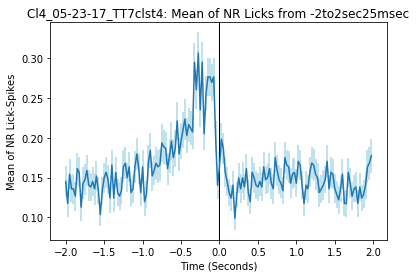

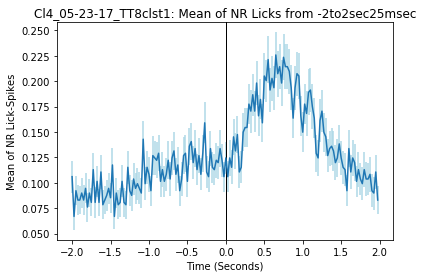

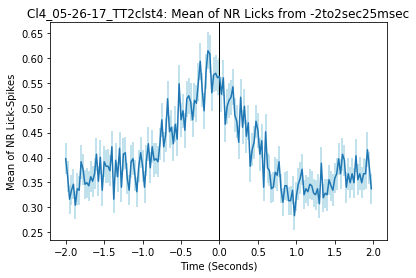

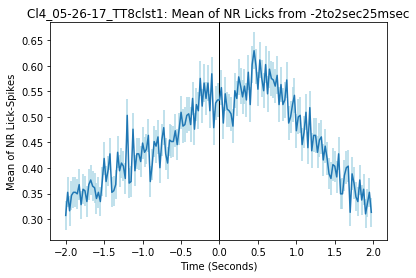

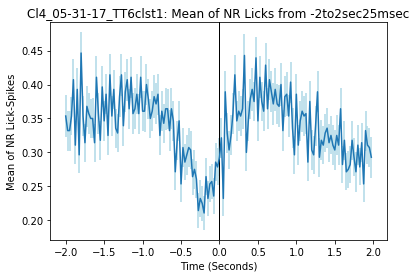

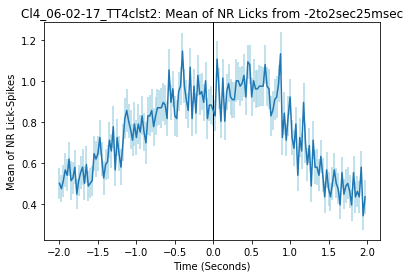

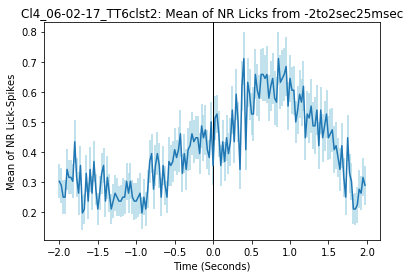

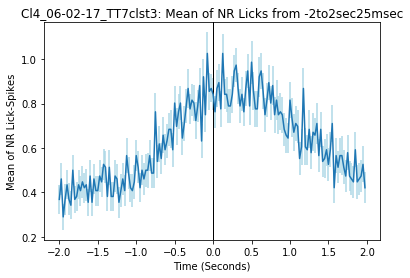

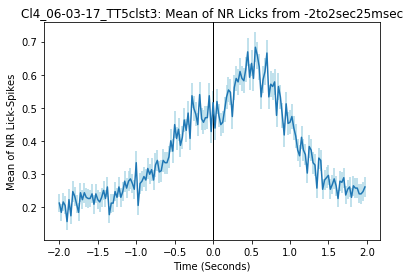

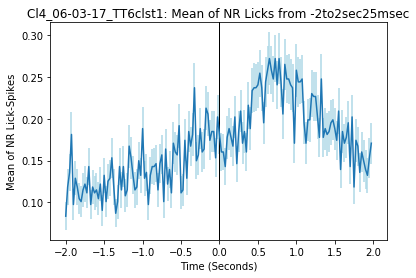

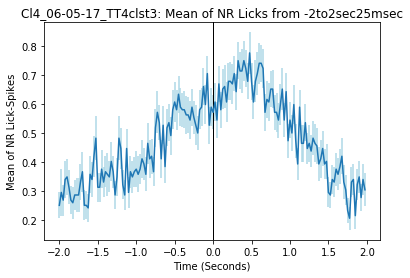

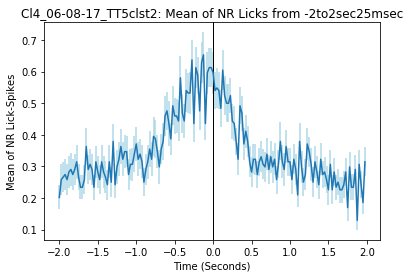

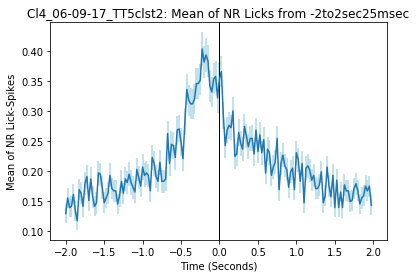

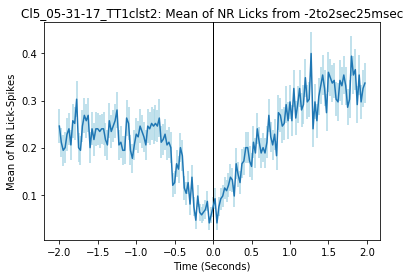

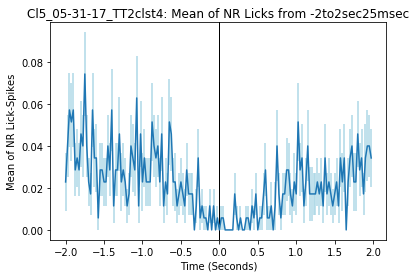

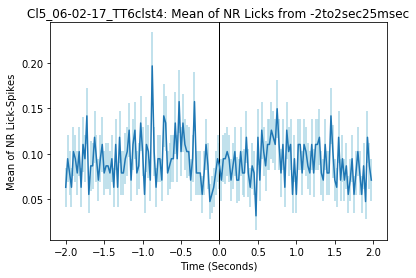

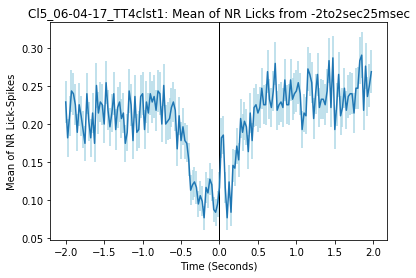

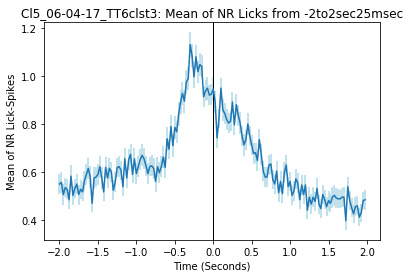

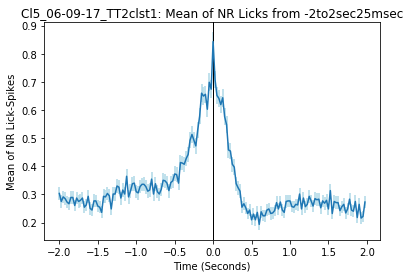

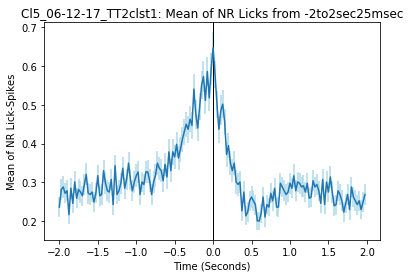

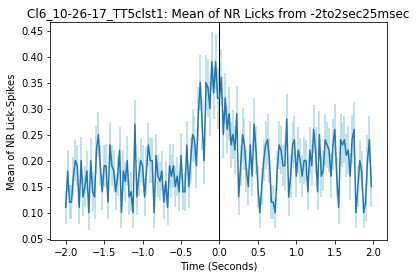

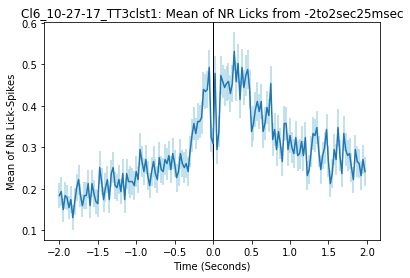

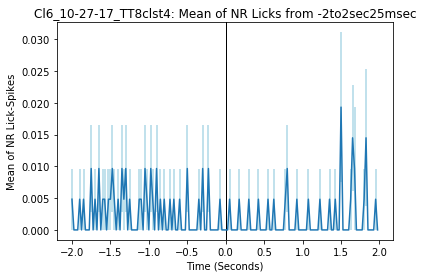

In [146]:
#Final line-graph
#Select specific neuron for histogram
#Line graph for specific neuron (left& right separate)
#Needed checking
#Add Category filter
#Left
from scipy import stats
import matplotlib.pyplot as plt

OptoTag_neuron = list(np.unique(master_log[master_log.Category == 'OptoTag'].unit_name))
for i in range(0, len(OptoTag_neuron)):
    Neuron_NR_licks_spikes = []
    for num in range(0, len(master_log.NR_licks_aligned_spikes)):
        if (len(master_log.Left_nonrewarded[num]) != 0) & (master_log.unit_name[num] == OptoTag_neuron[i]):
            for ind in range(0, len(master_log.NR_licks_aligned_spikes[num])):
                spike_times = master_log.loc[num, 'NR_licks_aligned_spikes'][ind]
                hist = np.histogram(spike_times, bins=int((2-(-2))/0.025), range=(-2,2))[0]
                Neuron_NR_licks_spikes.append(hist)
    
    bins_mean = list(np.mean(Neuron_NR_licks_spikes, axis=0))
    bins_time = list(np.arange(-2,2,0.025))
    bins_error = list(stats.sem(Neuron_NR_licks_spikes, axis=0))
    
    fig = plt.figure(figsize=(200,4))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    ax = fig.add_subplot(1, len(OptoTag_neuron), i+1)
    ax.errorbar(bins_time, bins_mean, yerr=bins_error, ecolor = 'lightblue')
    ax.set_xlabel('Time (Seconds)')
    ax.set_ylabel('Mean of NR Lick-Spikes')
    ax.set_title(str(OptoTag_neuron[i]+': Mean of NR Licks from -2to2sec25msec'))
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    #fig.savefig(str(OptoTag_neuron[i])+': Mean of NR Licks from -2to2sec25msec.pdf')

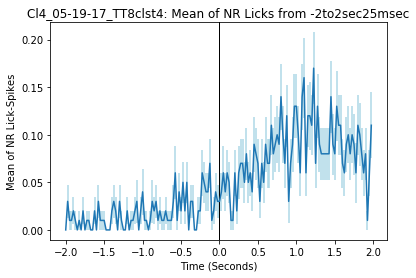

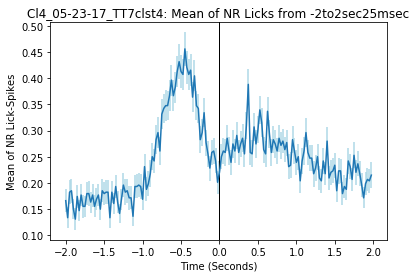

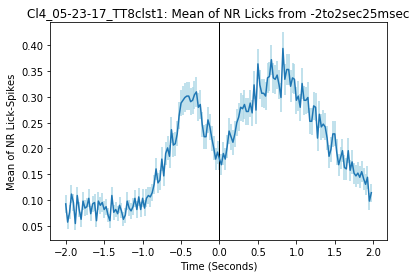

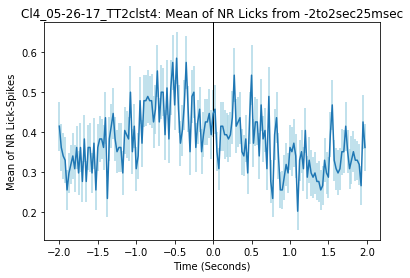

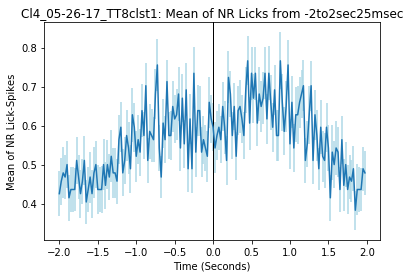

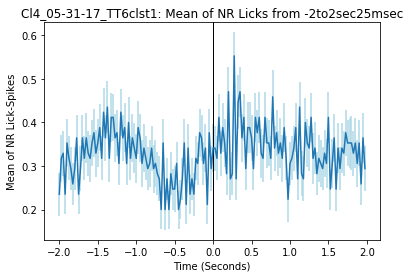

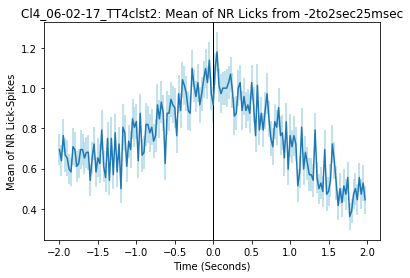

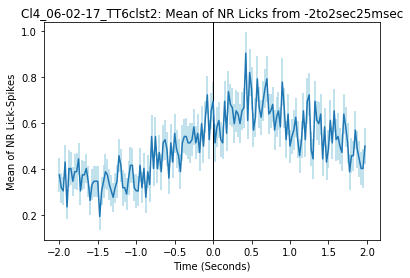

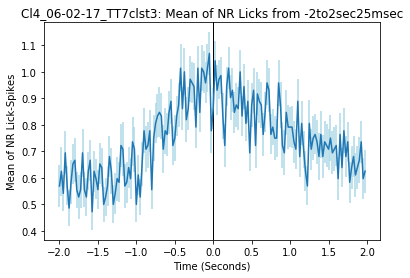

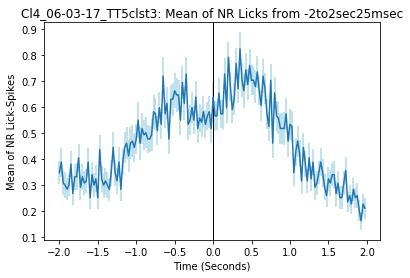

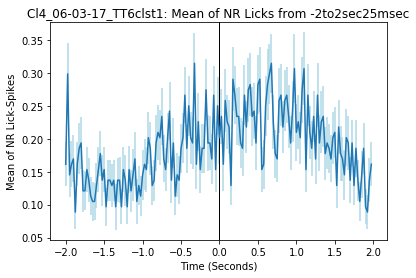

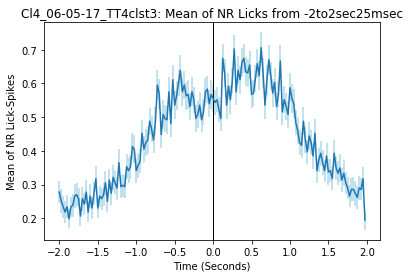

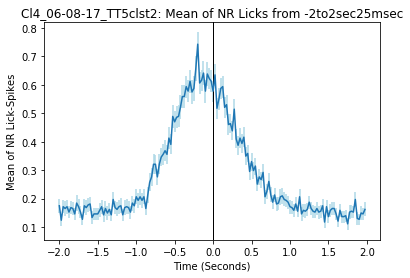

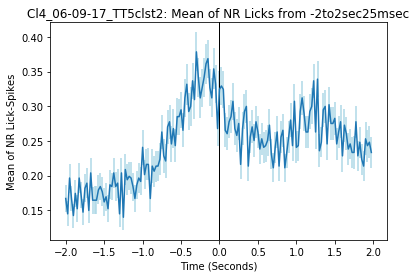

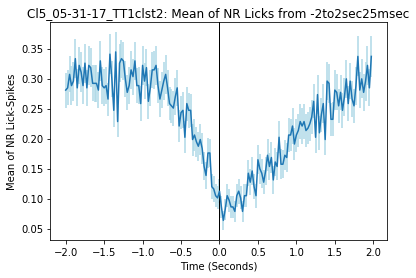

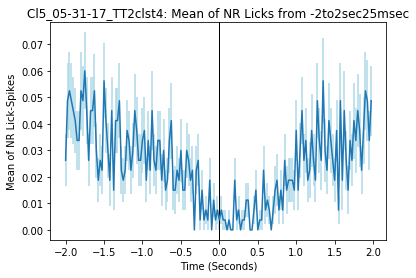

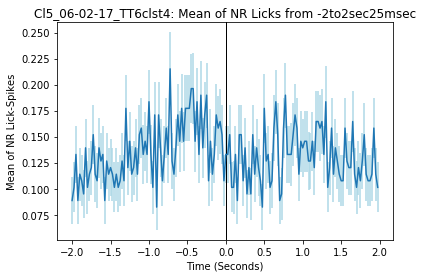

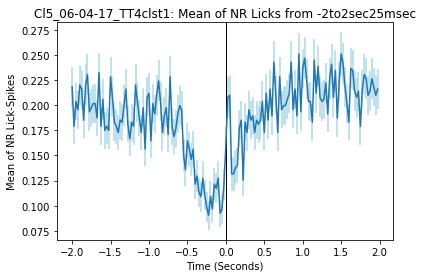

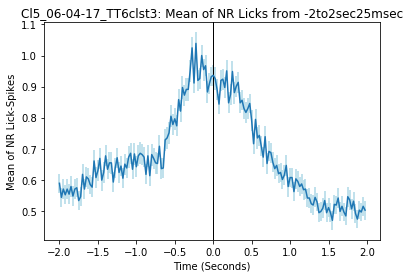

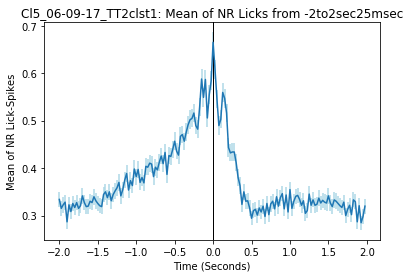

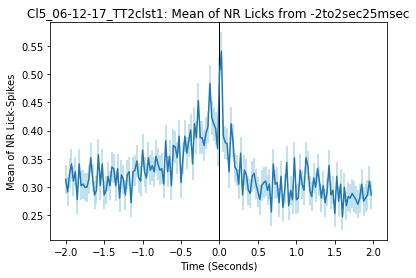

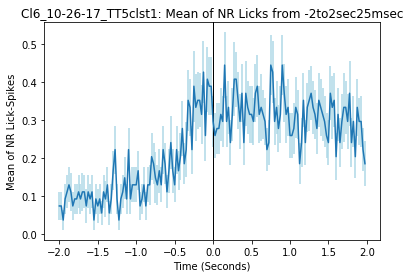

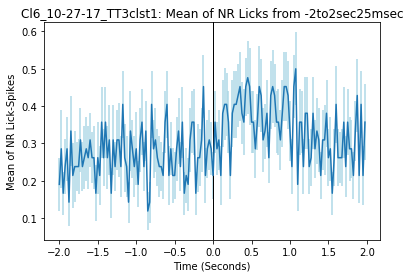

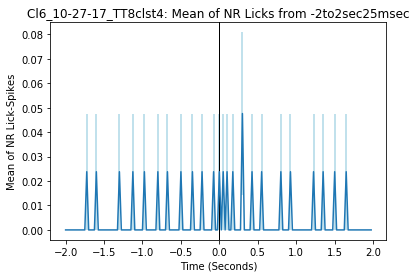

In [147]:
#Right
OptoTag_neuron = list(np.unique(master_log[master_log.Category == 'OptoTag'].unit_name))
for i in range(0, len(OptoTag_neuron)):
    Neuron_NR_licks_spikes = []
    for num in range(0, len(master_log.NR_licks_aligned_spikes)):
        if (len(master_log.Right_nonrewarded[num]) != 0) & (master_log.unit_name[num] == OptoTag_neuron[i]):
            for ind in range(0, len(master_log.NR_licks_aligned_spikes[num])):
                spike_times = master_log.loc[num, 'NR_licks_aligned_spikes'][ind]
                hist = np.histogram(spike_times, bins=int((2-(-2))/0.025), range=(-2,2))[0]
                Neuron_NR_licks_spikes.append(hist)
    
    bins_mean = list(np.mean(Neuron_NR_licks_spikes, axis=0))
    bins_time = list(np.arange(-2,2,0.025))
    bins_error = list(stats.sem(Neuron_NR_licks_spikes, axis=0))
    
    fig = plt.figure(figsize=(200,4))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    ax = fig.add_subplot(1, len(OptoTag_neuron), i+1)
    ax.errorbar(bins_time, bins_mean, yerr=bins_error, ecolor = 'lightblue')
    ax.set_xlabel('Time (Seconds)')
    ax.set_ylabel('Mean of NR Lick-Spikes')
    ax.set_title(str(OptoTag_neuron[i]+': Mean of NR Licks from -2to2sec25msec'))
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    #fig.savefig(str(OptoTag_neuron[i])+': Mean of NR Licks from -2to2sec25msec.pdf')

In [149]:
len(np.unique(master_log[master_log.Category == 'OptoTag'].unit_name))

24